In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic-dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         892 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [5]:
df.shape

(892, 12)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.duplicated().sum()

np.int64(0)

In [14]:
print(df.columns)
print(df['Name'])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
891                 Vestrom, Miss. Hulda Amanda Adolfina
Name: Name, Length: 892, dtype: object


In [15]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
df[cat_cols].nunique()
#Counts the number of unique values in each column

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

### df.isnull()

- Checks each value in the DataFrame.

- Returns True if the value is missing (NaN), else False.

### .sum()

- When applied on True/False values, Pandas treats True = 1 and False = 0.

- So summing counts the number of True values → i.e., number of missing values per column.

In [18]:
df.isnull().sum()
# this outputs the number of misiing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

In [ ]:
df_processed = df.drop(columns=['Name', 'Ticket', 'PassengerId'])
df_processed.head()

# df.drop(columns=[...])
#Removes the specified columns from the DataFrame.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [27]:
df_processed.dropna(subset=['Embarked'], inplace=True)
df_processed.head()

#dropna()
#Removes rows with NaN (missing) values.
#By default, it checks all columns, but here we use subset=['Embarked'].
#subset=['Embarked']
#Means: only look at the Embarked column.
#If a row has NaN in Embarked, that whole row is dropped.

#inplace=True
#Modifies df_processed directly (no new DataFrame is created).
#If you didn’t use this, you’d have to write: 
#df_processed = df_processed.dropna(subset=['Embarked'])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


**df_processed.info() Prints a summary of the DataFrame:**

- Number of rows (entries)

- Index range

- Column names

- Non-null count (how many values are not missing in each column)

- Data type (int64, float64, object, etc.)

- Memory usage

In [28]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       713 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  890 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


**df_processed['Age']**

- Selects the Age column.

**.fillna(...)**

- Replaces missing values (NaN) with something you choose.

- Here, you’re filling them with the mean age.

**df_processed['Age'].mean()**

- Calculates the average (mean) of the non-missing ages.

In [29]:
df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True)
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Cabin     202 non-null    object 
 8   Embarked  890 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_12848\2647883964.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].mean(), inplace=True)


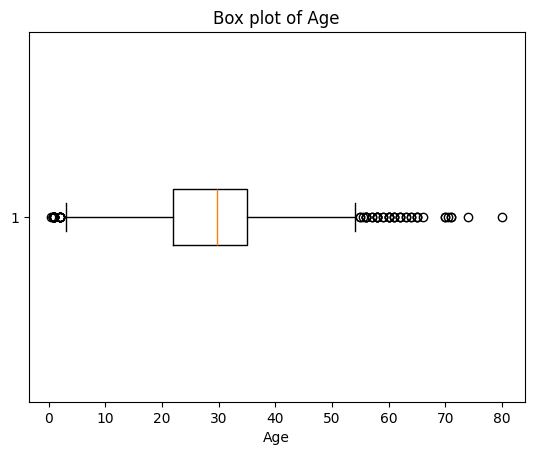

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df_processed['Age'], vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

#vert=False
#By default, boxplots are vertical.
#Setting vert=False makes it horizontal

In [31]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

outliers = df_processed[(df_processed['Age'] < lower_bound) | (df_processed['Age'] > upper_bound)]

In [32]:
outliers.shape

(68, 9)

In [ ]:
df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]
# That line removes all rows where Age is an outlier (outside mean ± 2 × std).

In [34]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  822 non-null    int64  
 1   Pclass    822 non-null    int64  
 2   Sex       822 non-null    object 
 3   Age       822 non-null    float64
 4   SibSp     822 non-null    int64  
 5   Parch     822 non-null    int64  
 6   Fare      822 non-null    float64
 7   Cabin     175 non-null    object 
 8   Embarked  822 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 64.2+ KB


In [ ]:
df_processed.fillna(df_processed['Age'].mean()).info()

#fillna() replaces all missing values (NaN) in the DataFrame.
#Here, you’re replacing any missing value with the mean of the Age column.
#Important: You did not use inplace=True, so this returns a new DataFrame with NaNs filled.

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  822 non-null    int64  
 1   Pclass    822 non-null    int64  
 2   Sex       822 non-null    object 
 3   Age       822 non-null    float64
 4   SibSp     822 non-null    int64  
 5   Parch     822 non-null    int64  
 6   Fare      822 non-null    float64
 7   Cabin     822 non-null    object 
 8   Embarked  822 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 64.2+ KB


In [36]:
mean_age = df_processed['Age'].mean()
std_age = df_processed['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 8.94094217333858, Upper Bound: 49.2957179413886


In [37]:
df_processed = df_processed[(df_processed['Age'] >= lower_bound) & (df_processed['Age'] <= upper_bound)]
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  763 non-null    int64  
 1   Pclass    763 non-null    int64  
 2   Sex       763 non-null    object 
 3   Age       763 non-null    float64
 4   SibSp     763 non-null    int64  
 5   Parch     763 non-null    int64  
 6   Fare      763 non-null    float64
 7   Cabin     156 non-null    object 
 8   Embarked  763 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 59.6+ KB


In [38]:
X = df_processed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df_processed['Survived']

In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
#!pip install scikit-learn

**MinMaxScaler()**
- Scales data to a fixed range, usually [0, 1]
- Checks dtype != 'object' → keeps only numbers.

**fit_transform()**
- fit → calculates min and max for each column.
- transform → applies the scaling.

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols = [col for col in X.columns if X[col].dtype != 'object']
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12848\2776591866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.325,0.125,0.0,0.014151,S
1,0.0,female,0.725,0.125,0.0,0.139136,C
2,1.0,female,0.425,0.000,0.0,0.015469,S
3,0.0,female,0.650,0.125,0.0,0.103644,S
4,1.0,male,0.650,0.000,0.0,0.015713,S


In [44]:
X.to_csv('X_processed.csv', index=False)
y.to_csv('y_processed.csv', index=False)

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.save')

['scaler.save']

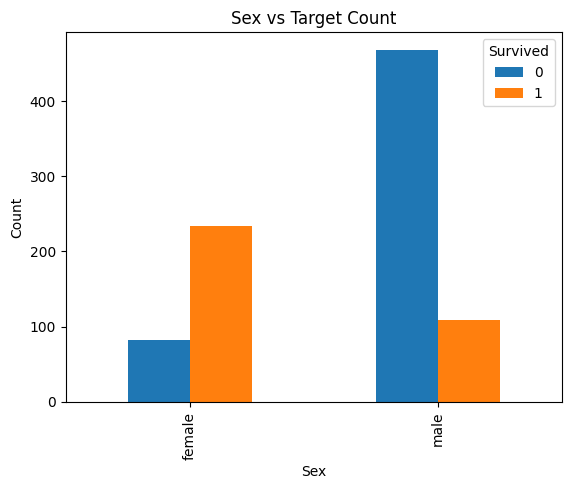

In [46]:
grouped = df.groupby('Sex')['Survived'].value_counts().unstack()
grouped.plot(kind='bar', stacked=False)  # stacked=True for stacked bars
plt.ylabel("Count")
plt.title("Sex vs Target Count")
plt.show()

In [48]:
#pip install seaborn

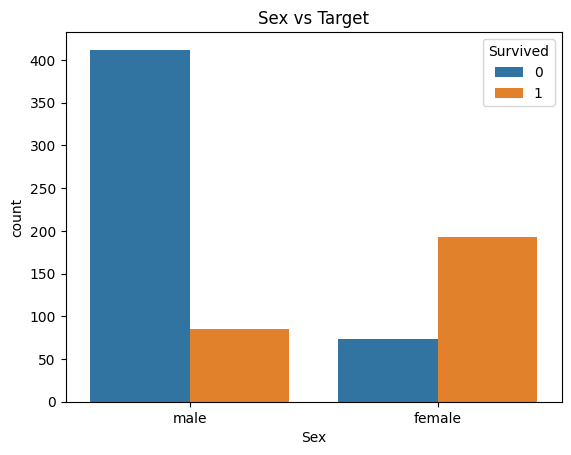

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Load data
X = pd.read_csv('X_processed.csv')
y = pd.read_csv('y_processed.csv')

# Combine X and y into one DataFrame for plotting
df = pd.concat([X, y], axis=1)

# Plot: count of each Sex for each target class
sns.countplot(data=df, x='Sex', hue='Survived')  # Replace 'Survived' with your y column name
plt.title("Sex vs Target")
plt.show()
